<a href="https://colab.research.google.com/github/choius0528/Machine-Learning_Study/blob/main/10%EC%A3%BC%EC%B0%A8/LSTM_w10_smartphones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LSTM 실습
UCI - Human Activity Recognition Using Smartphones 데이터 활용

In [8]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns



def load_file(filepath):
    dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    # stack group so that features are the 3rd dimension
    loaded = np.dstack(loaded)
    return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    # body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y


# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
    # load all train
    trainX, trainy = load_dataset_group('train', prefix + '/content/drive/MyDrive/Colab Notebooks/UCI-HAR/')
    # load all test
    testX, testy = load_dataset_group('test', prefix + '/content/drive/MyDrive/Colab Notebooks/UCI-HAR/')

    #zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    #one hot encode y
    trainy_one_hot = to_categorical(trainy)
    testy_one_hot = to_categorical(testy)
    print(trainX.shape, trainy.shape, trainy_one_hot.shape, testX.shape, testy.shape, testy_one_hot.shape)
    return trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot

trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot = load_dataset()

from sklearn.model_selection import train_test_split

X_train,X_val,y_train_one_hot,y_val_one_hot,y_train,y_val=train_test_split(trainX, trainy_one_hot, trainy,test_size=0.2,random_state=100)

X_train.shape,X_val.shape,y_train_one_hot.shape,y_val_one_hot.shape,y_train.shape,y_val.shape

/tmp/ipython-input-1973390525.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-1973390525.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-1973390525.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-1973390525.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=Tr

(7352, 128, 9) (7352, 1) (7352, 6) (2947, 128, 9) (2947, 1) (2947, 6)


((5881, 128, 9), (1471, 128, 9), (5881, 6), (1471, 6), (5881, 1), (1471, 1))

In [9]:
#LSTM 모델 적용
import tensorflow as tf

model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(6, activation='softmax') # 6 units for 6 classes, softmax activation
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
#LSTM 모델 컴파일
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
#LSTM 모델을 이용한 학습
history_lstm = model_lstm.fit(X_train, y_train_one_hot, epochs=30, batch_size=32, validation_data=(X_val, y_val_one_hot))

Epoch 1/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 29s 140ms/step - accuracy: 0.4411 - loss: 1.4060 - val_accuracy: 0.6077 - val_loss: 0.9788
Epoch 2/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 21s 114ms/step - accuracy: 0.6549 - loss: 0.8201 - val_accuracy: 0.7335 - val_loss: 0.5965
Epoch 3/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 20s 108ms/step - accuracy: 0.8146 - loss: 0.4877 - val_accuracy: 0.9245 - val_loss: 0.3027
Epoch 4/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 18s 100ms/step - accuracy: 0.9059 - loss: 0.3021 - val_accuracy: 0.9184 - val_loss: 0.2526
Epoch 5/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 22s 108ms/step - accuracy: 0.9241 - loss: 0.2295 - val_accuracy: 0.9368 - val_loss: 0.1986
Epoch 6/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 22s 114ms/step - accuracy: 0.9385 - loss: 0.1717 - val_accuracy: 0.9245 - val_loss: 0.1945
Epoch 7/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 30s 165ms/step - accuracy: 0.9263 - loss: 0.2236 - val_accuracy: 0.9497 - val_loss: 0.1686
Epoch 8/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 34s 129ms/step - accuracy: 0.9507 - loss: 0

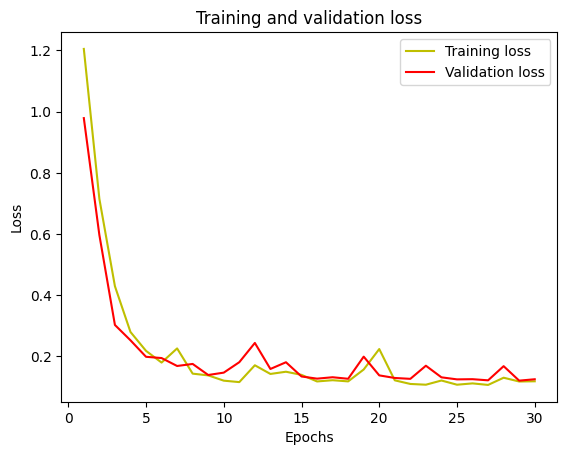

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =history_lstm.history['loss']
val_loss =history_lstm.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

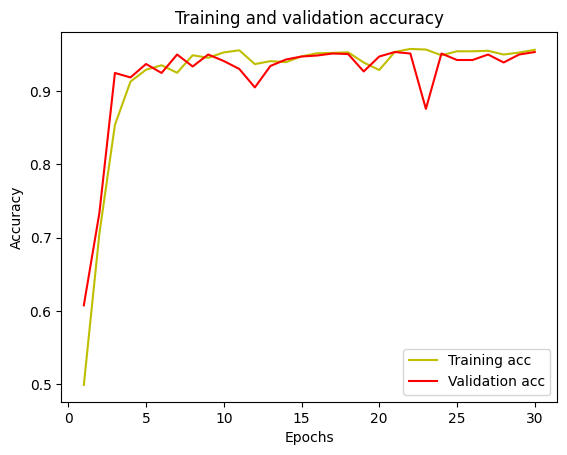

In [20]:
acc = history_lstm.history['accuracy']
val_acc = history_lstm.history['val_accuracy']
plt.plot(epochs, acc, 'y', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(32, 128, 9))', 'Tensor(shape=(32, 128, 9))', 'Tensor(shape=(32, 128, 9))', 'Tensor(shape=(32, 128, 9))')
  warnings.warn(msg)


91/93 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(None, 128, 9))', 'Tensor(shape=(None, 128, 9))', 'Tensor(shape=(None, 128, 9))', 'Tensor(shape=(None, 128, 9))')
  warnings.warn(msg)


93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step
[[450  25  21   0   0   0]
 [  9 462   0   0   0   0]
 [  0   0 420   0   0   0]
 [  3   3   0 389  96   0]
 [  0   0   0  91 441   0]
 [  0  27   0   0   0 510]]
0.9066847641669494
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       496
           1       0.89      0.98      0.94       471
           2       0.95      1.00      0.98       420
           3       0.81      0.79      0.80       491
           4       0.82      0.83      0.83       532
           5       1.00      0.95      0.97       537

    accuracy                           0.91      2947
   macro avg       0.91      0.91      0.91      2947
weighted avg       0.91      0.91      0.91      2947



<Axes: >

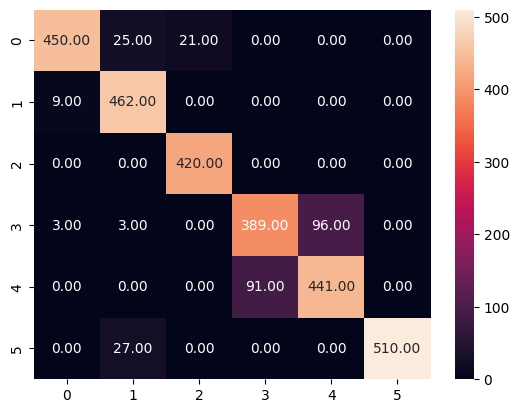

In [21]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

pred = model_lstm.predict([testX,testX,testX,testX])
pred = np.argmax(pred, axis = -1)
cm = confusion_matrix(testy,pred)
print(cm)
print(accuracy_score(testy,pred))
print(classification_report(testy,pred))
sns.heatmap(cm, annot=True, fmt = '.2f')